# Notebook 3:  Agrupamiento Jerárquico y Redes de Kohonen 
En este notebook vamos a implementar dos algoritmos de clustering: el agrupamiento jeráquico  de clustering y los mapas autoorganizados (SOM) o redes de Kohonen en R. El objetivo es entender como funcionan estos algoritmos y  aprender a utilizarlos con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [11]:
help(hclust)

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


In [53]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

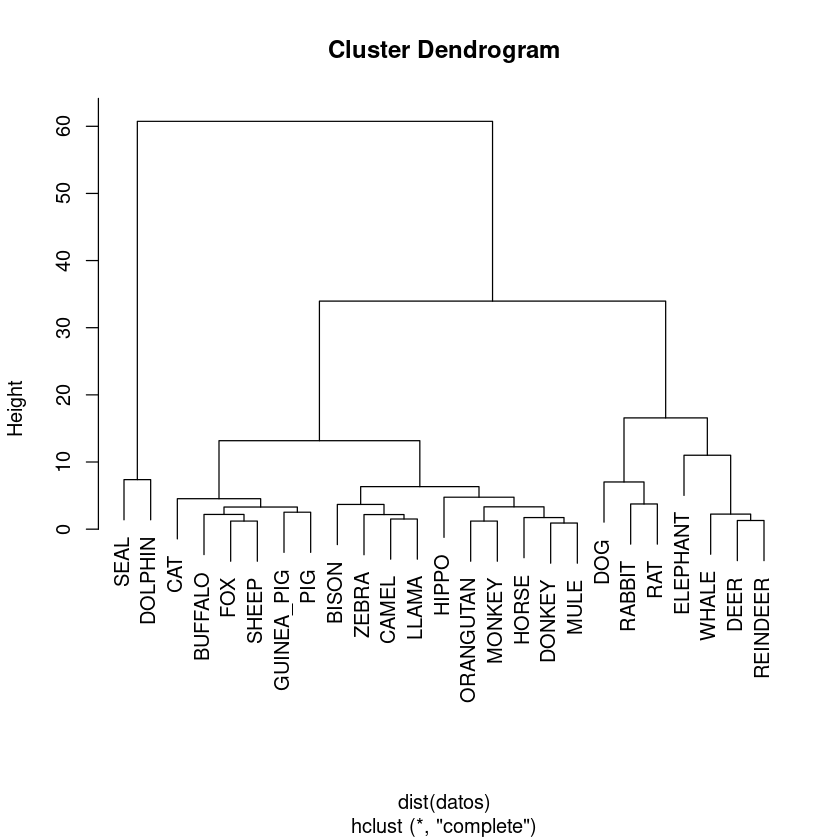

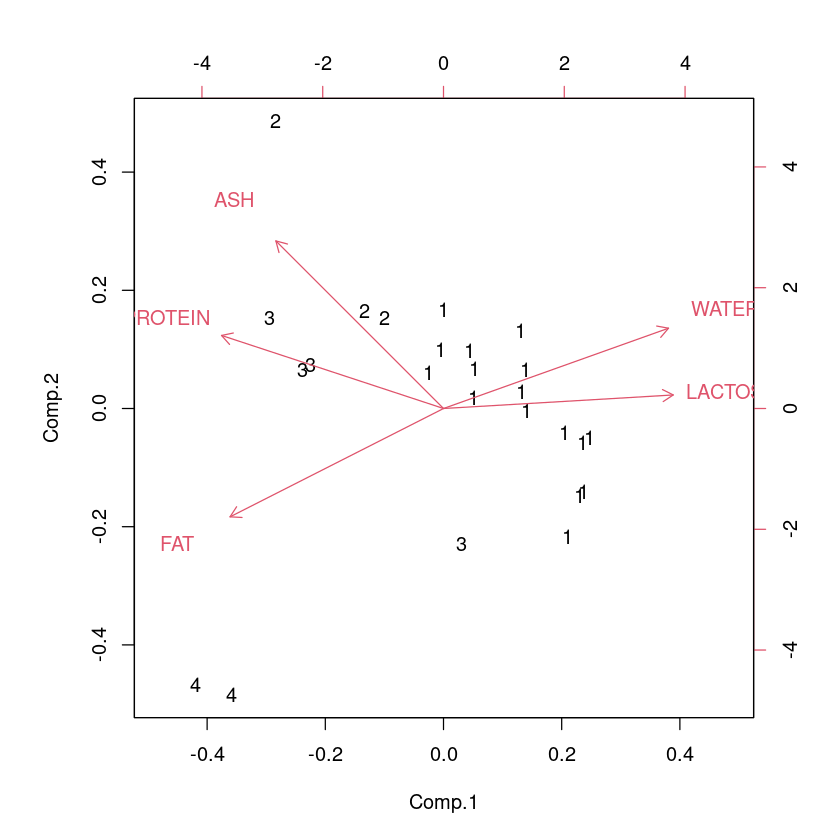

In [54]:
res3 <- hclust(dist(datos))
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 1:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 


#### Respuesta Ejercicio 1
a) El análisis jerárquico aglomerativo comienza considerando cada observación como un grupo independiente y, en cada paso, fusiona los grupos más cercanos hasta formar un único grupo. Este proceso se basa en una matriz de distancias y un método de agrupamiento como "single", "complete" o "average" (por defecto, "complete").  
Parámetros principales:
* d: Matriz de distancias entre observaciones.
* method: Método de agrupamiento ("single", "complete", "average", etc.).
* members: Opcional, define grupos iniciales para el algoritmo.

Resultado:
Devuelve un objeto de tipo hclust con:
* merge: Matriz que describe las fusiones en cada paso.
* height: Distancia entre los grupos fusionados en cada paso.
* order: Orden de las observaciones para graficar sin cruces.  
La función cutree permite dividir el dendrograma en un número específico de grupos o según un valor de corte en la altura (height).

b) Al analizar los datos que se muestran obtenidos por el uso de hclust podemos darnos cuenta que existen 4 grupos definidos por cutree, mostrando asi mismo que los datos tienen caracteristicas similares en cada grupo.  
El dendograma nos muestra la jerarquia que existe y que se agrupan en diferentes niveles.

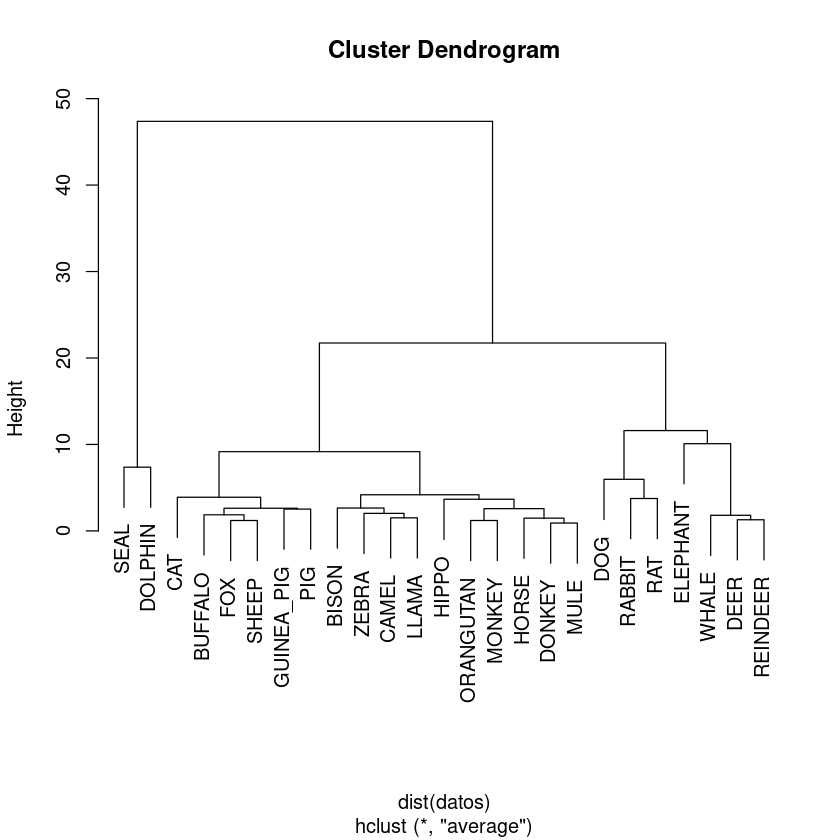

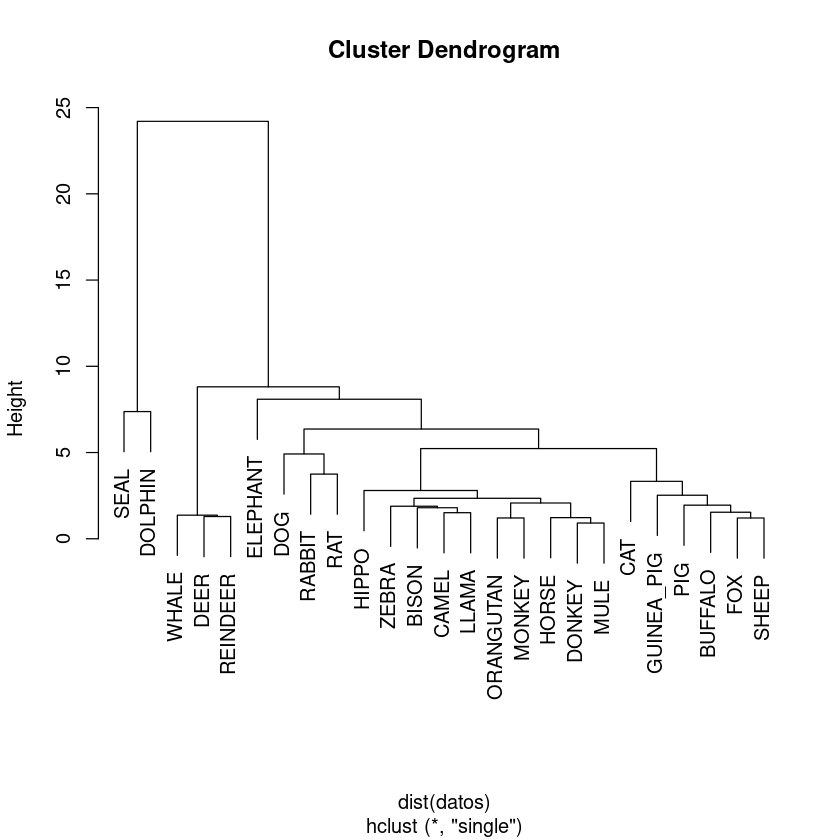

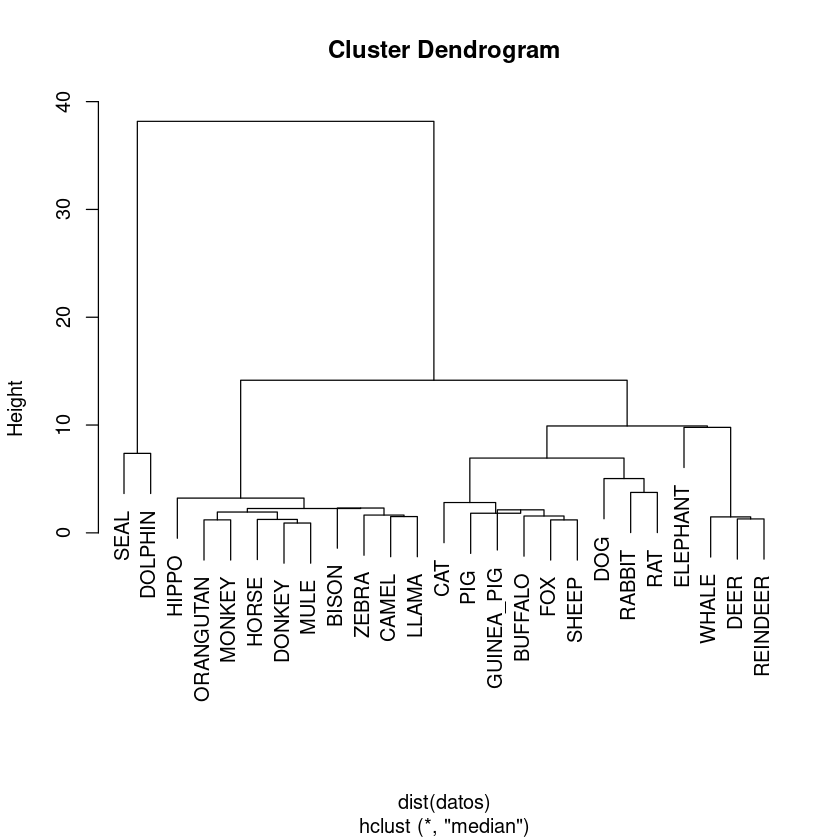

In [55]:
par(bg = "white")
res4 <- hclust(dist(datos), method="average")
plot(res4)
res5 <- hclust(dist(datos), method="single")
plot(res5)
res6 <- hclust(dist(datos), method="median")
plot(res6)

c) Al utilizar distintos parametros se puede ver que:
* Al utilizar el parametro *"Average"* se obtienen resultados similares, osea que ambos generan grupos mas consistentes.
* Al usar el parametro *"Single"* las diferentes etiquetas se generan mas rapido, lo que puede significar grupos menos definidos, cosa que nos ayuda para ver relaciones debiles entre observaciones, por lo que unicamente nos sirve en casos especificos

**A continuación instalamos la biblioteca kohonen para utilizar som, el método de mapas autoorganizados que permite realizar un análisis de agrupamiento**

In [59]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

In [15]:
help(som)

supersom {kohonen},R Documentation
"X, Y","numerical data matrices, or factors. No data.frame objects are allowed - convert them to matrices first."
data,"list of data matrices (numerical) of factors. If a vector is entered, it will be converted to a one-column matrix. No data.frame objectss are allowed."
grid,a grid for the codebook vectors: see somgrid.
rlen,the number of times the complete data set will be presented to the network.
alpha,"learning rate, a vector of two numbers indicating the amount of change. Default is to decline linearly from 0.05 to 0.01 over rlen updates. Not used for the batch algorithm."
radius,"the radius of the neighbourhood, either given as a single number or a vector (start, stop). If it is given as a single number the radius will change linearly from radius to zero; as soon as the neighbourhood gets smaller than one only the winning unit will be updated. Note that the default before version 3.0 was to run from radius to -radius. If nothing is supplied, the default is to start with a value that covers 2/3 of all unit-to-unit distances."
whatmap,What data layers to use. If unspecified all layers are used.
user.weights,"the weights given to individual layers. This can be a single number (all layers have the same weight, the default), a vector of the same length as the whatmap argument, or a vector of the same length as the data argument. In xyf maps, this argument provides the same functionality as the now-deprecated xweight argument that was used prior to version 3.0."
maxNA.fraction,the maximal fraction of values that may be NA to prevent the row to be removed.
keep.data,"if TRUE, return original data and mapping information. If FALSE, only return the trained map (in essence the codebook vectors)."


[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5356874  1.0729314  2.6899058 -2.02042124 -0.32965999
V2 -0.7799697  1.2599683  0.6351271 -0.96937503  1.62080612
V3  0.1782588  0.2255258 -0.2440329  0.02172521  0.05902769
V4  0.8071564 -0.9927413 -0.7233456  0.86466273 -0.73162491



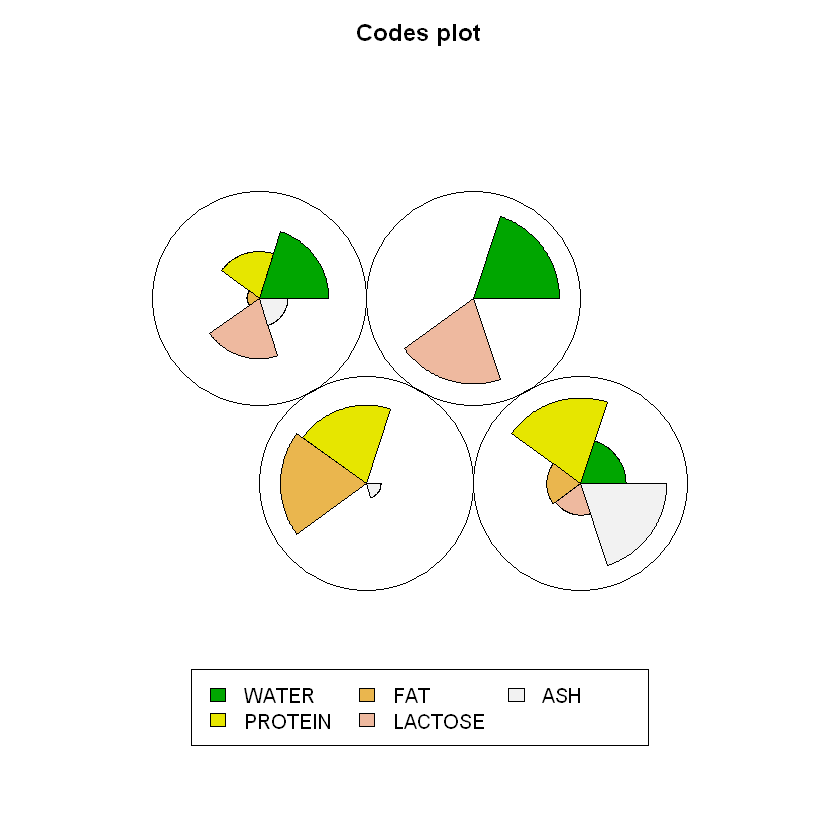

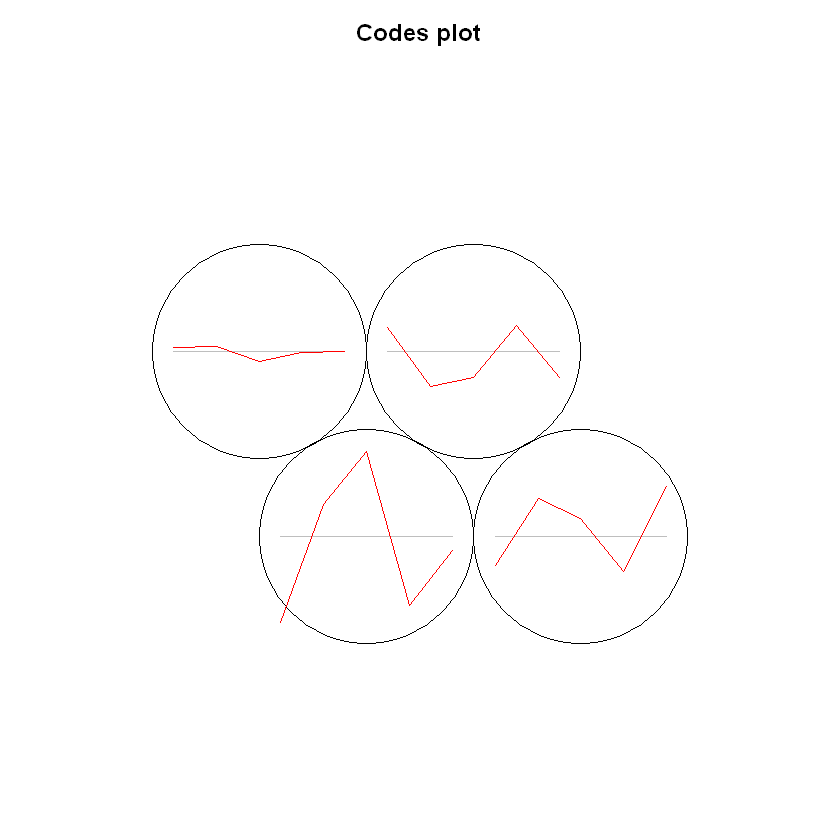

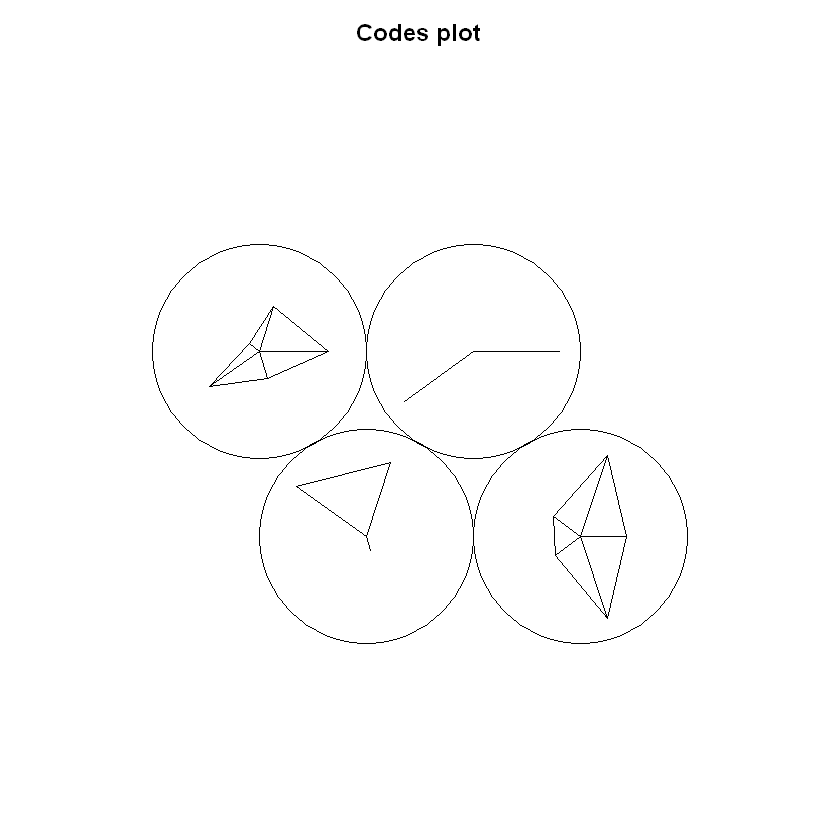

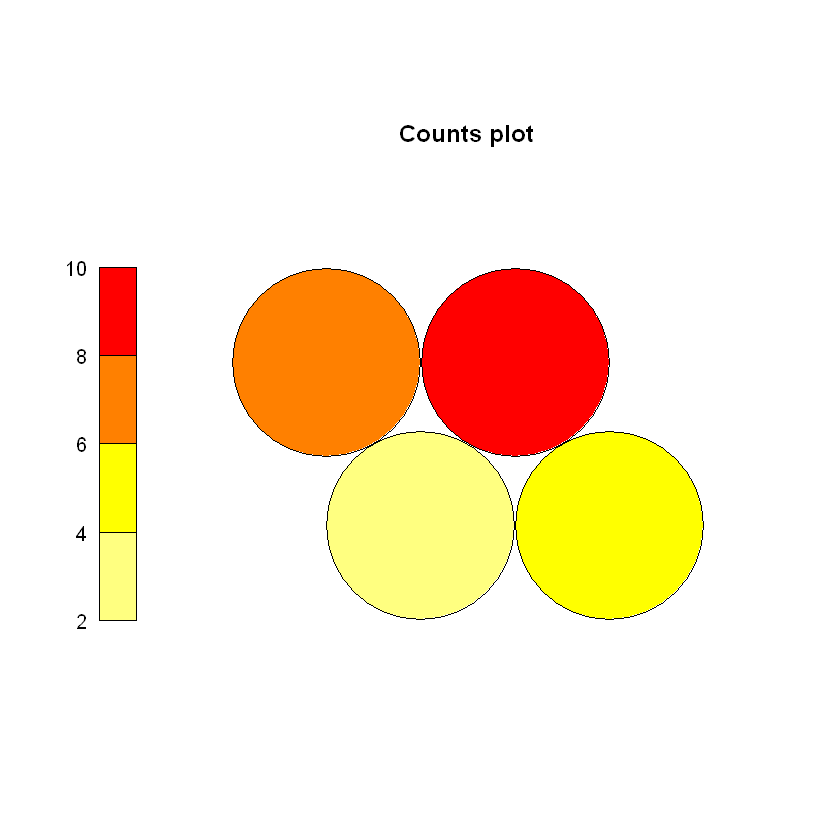

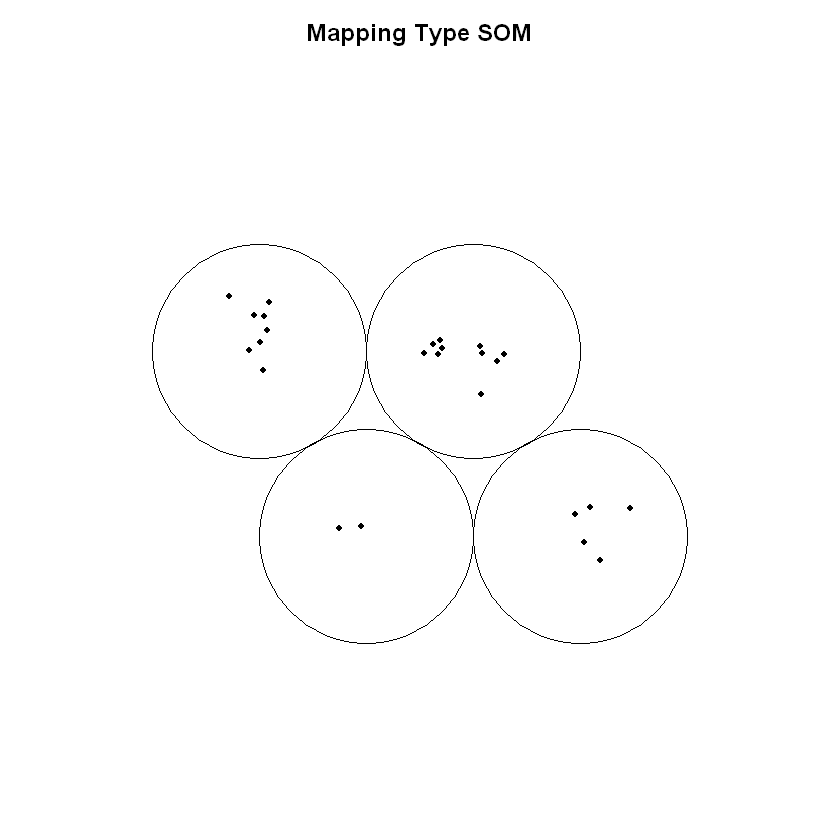

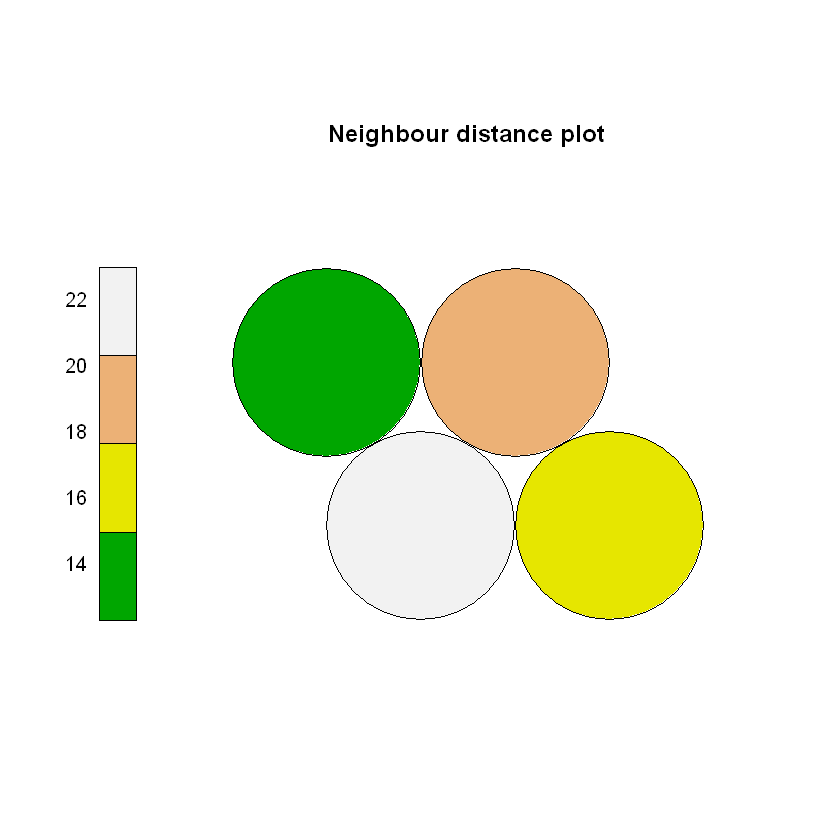

In [16]:
#create SOM grid
sommap <- som(scale(datos), rlen=1000, grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


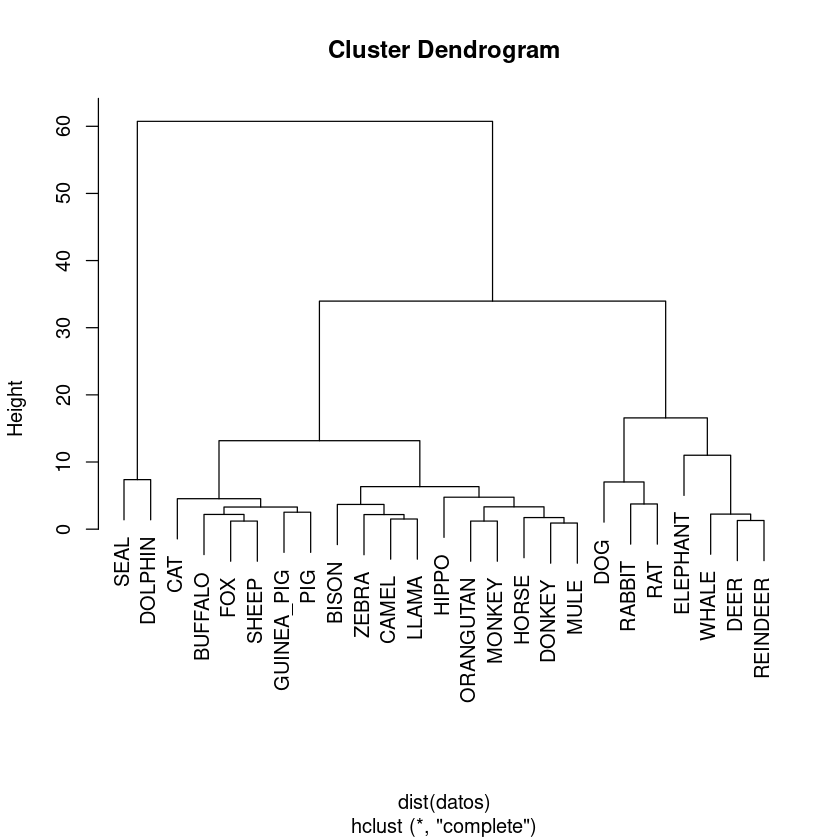

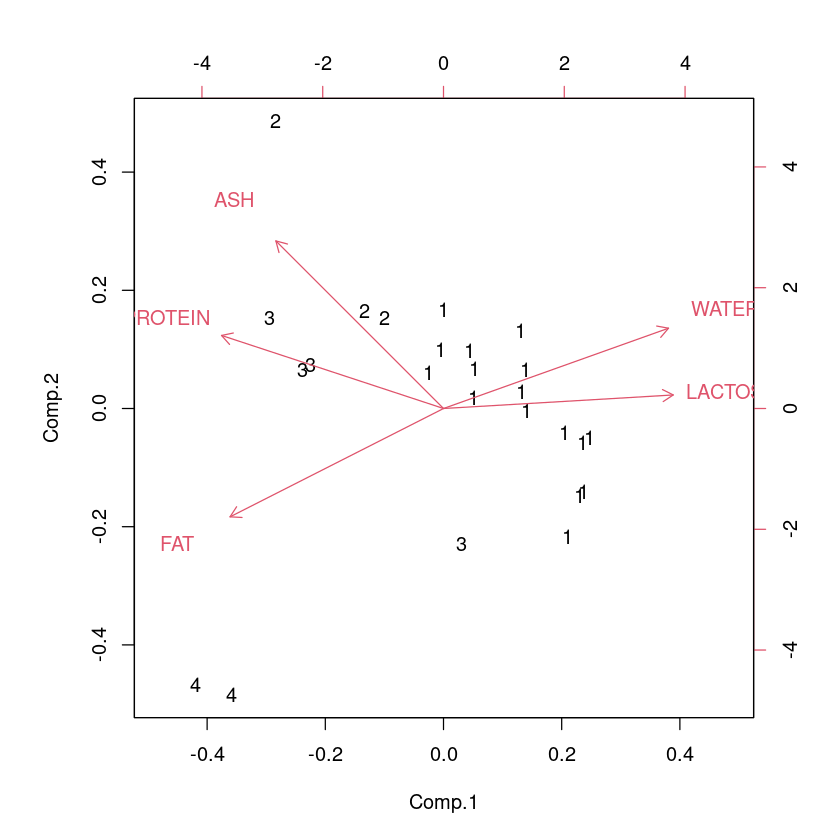

In [2]:
res3 <- hclust(dist(datos), method = "complete")
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

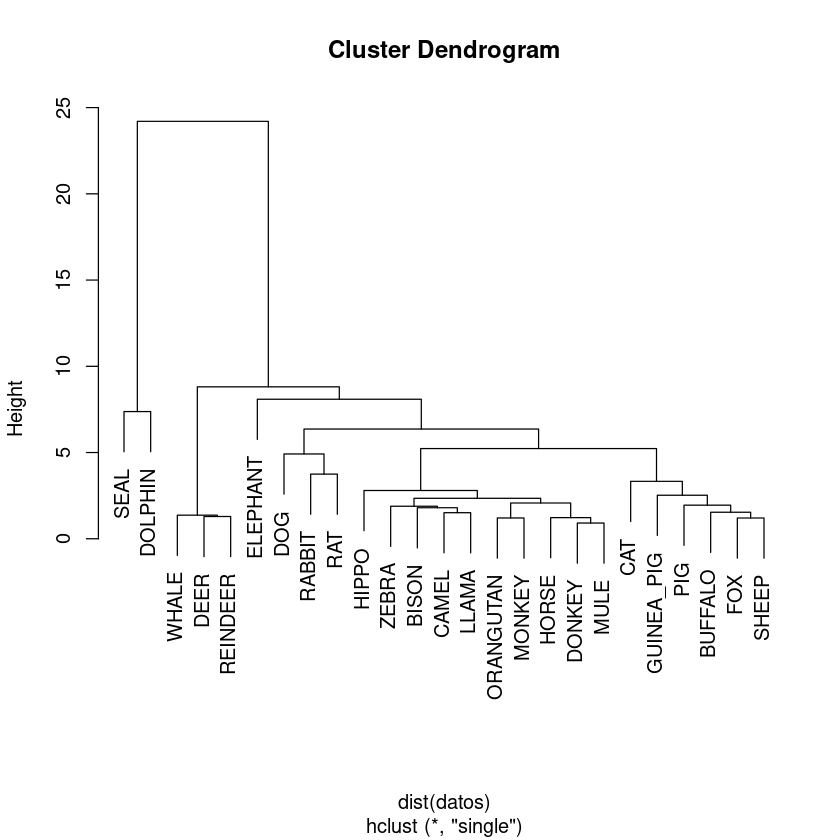

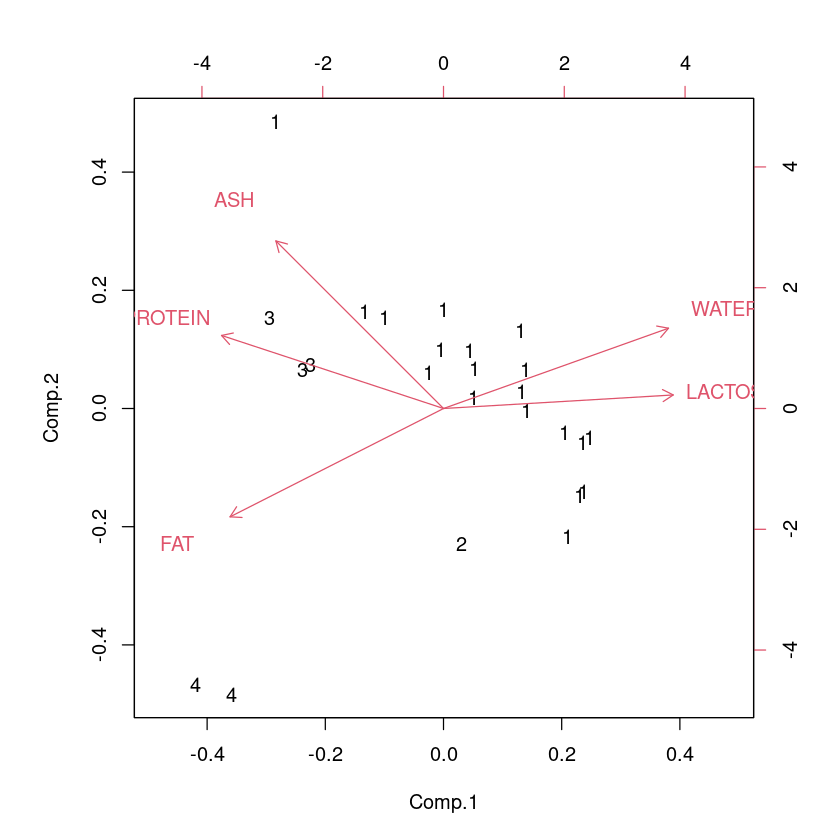

In [3]:
res3 <- hclust(dist(datos), method = "single")
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

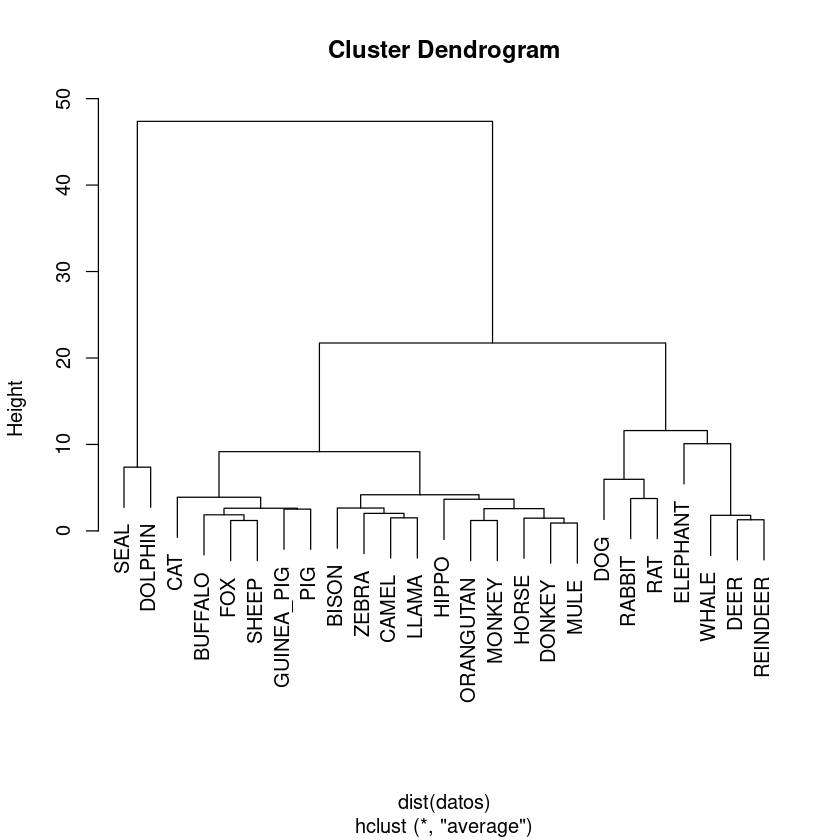

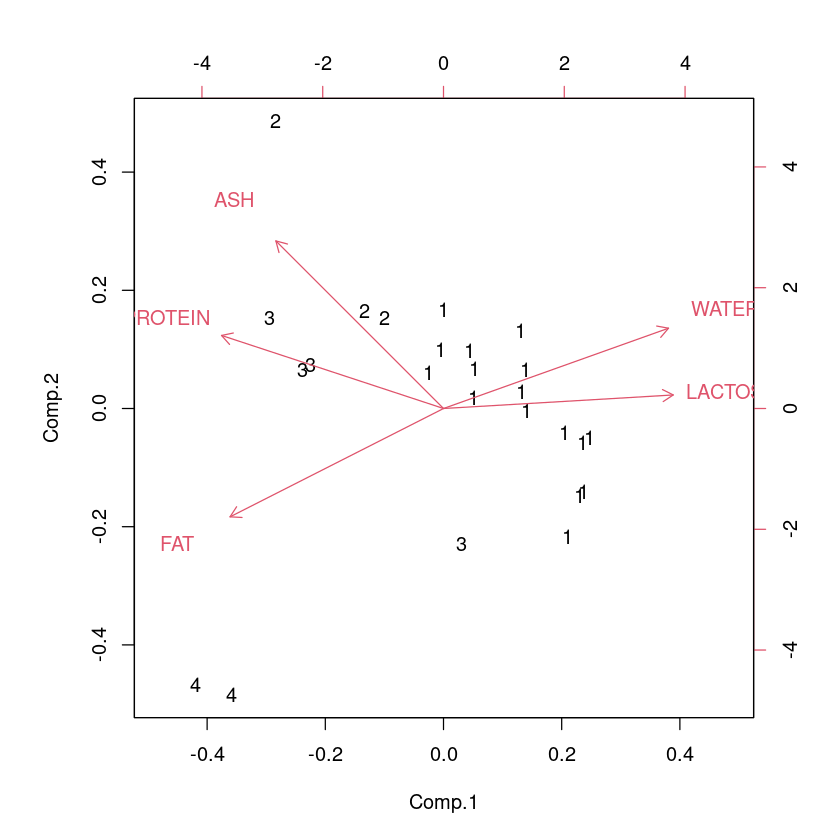

In [4]:
res3 <- hclust(dist(datos), method = "average")
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 2:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

c) Compare estos resultados con los del agrupamiento jerárquico. Discuta sus resultados.

#### Respuestas Ejercicio 2
a) El método SOM (Self-Organizing Map) ajusta una red neuronal que transforma datos de alta dimensionalidad en un mapa bidimensional compuesto por una malla de nodos. Utiliza el algoritmo de autoorganización de Kohonen y la distancia euclidiana para organizar los nodos.

Parámetros principales:
* data: Matriz donde cada fila es una observación.
* grid: Tipo de malla del mapa.
* rlen: Número de iteraciones sobre el conjunto de datos (por defecto, 100).
* alpha: Tasa de aprendizaje, definida como un rango que varía linealmente.
* radius: Radio de activación.
* init: Pesos iniciales de la red (por defecto, valores aleatorios dentro del rango de los datos).

Salida:
El resultado es un objeto de la clase kohonen, que incluye:
* grid: La malla del mapa.
* codes: Pesos de cada nodo.
* changes: Vector con las distancias promedio entre nodos vecinos en cada iteración (indica el ajuste de la red).
* unit.classif: Nodo activado por cada observación (si keep.data = TRUE).
* distances: Distancia entre cada observación y su nodo activado (si keep.data = TRUE).


Esta funcion genera unos cuantos graficos, donde cada uno representa algo distinto, las cosas que se estudian en estos graficos son:
* Pesos de cada variable en los nodos.
* Número de observaciones asociadas a cada nodo.
* Ubicación de las observaciones en el mapa.
* Distancia unificada entre nodos vecinos, que resume la relación entre datos originales y nodos activados.


1 2 3 4 5 6 
4 4 6 2 5 4 

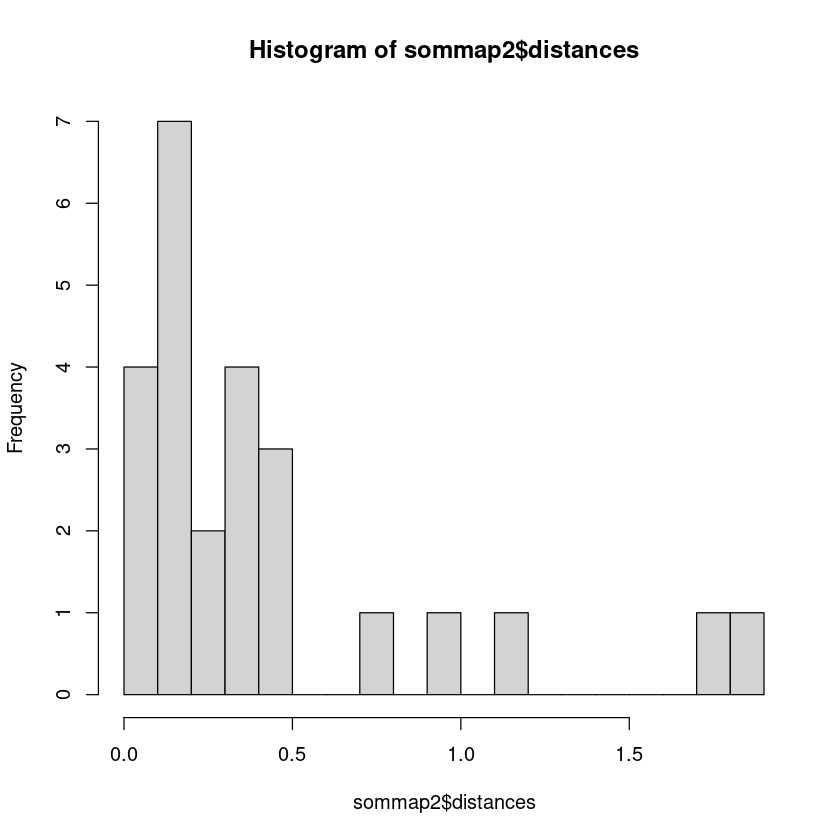

In [61]:
par(bg="white")
sommap2 <- som(scale(datos), rlen=2000, grid = somgrid(3, 2, "hexagonal"), keep.data = TRUE) 
hist(sommap2$distances, breaks = 20)
table(sommap2$unit.classif)

####

b) Al activar la opcion de *keep.data* a verdadero y aumentar el tamaño de la grilla que se utiliza, podemos analizar los nodos que fueron activados, mostrando asi que, en la ejecucion anterior, el nodo 6 fue el menos visitado, osea que es una region menos densa, mientras que el nodo 2 y 3 tiene una region mas densa debido a que posee una cantidad de observaciones mayor a los otros nodos.  
Asi mismo se puede analizar la distancia, dando que los nodos son cercanos entre si y asi mismo podemos decir que los datos son homogeneos

c) Al comparar los resultados de SOM con los del agrupamiento jerárquico, se observa que ambos métodos identifican patrones similares en los datos, pero presentan diferencias en la forma de representar los grupos. En hclust, los grupos se definieron utilizando cutree, mostrando 4 clústeres consistentes, mientras que en SOM los nodos 2 y 3 fueron los más densos, indicando regiones con mayor concentración de datos, y el nodo 6 fue el menos visitado, representando una región menos densa, pero asi mismo sugiere que los datos son mas homogeneos. De esto se puede decir que SOM proporciona una representación visual más intuitiva y detallada, mientras que hclust es más útil para entender relaciones jerárquicas entre los grupos que se puedan generar.

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos. 

b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

#### a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos.

In [24]:
library(factoextra)
library(cluster)
library(ggplot2)

datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")
df <- data.frame(datosC[,4:14])
datos_escalados <- scale(datosC[, 4:14])

names(datosC[,4:14])  # Nombres de las columnas
summary(datosC[, 1:14]) # Resumen estadistico

[1] "popularity"       "acousticness"     "danceability"     "duration_ms"     
 [5] "energy"           "instrumentalness" "liveness"         "loudness"        
 [9] "speechiness"      "tempo"            "valence"

    genre           artist_name         track_name          popularity   
 Length:149         Length:149         Length:149         Min.   : 0.00  
 Class :character   Class :character   Class :character   1st Qu.:29.00  
 Mode  :character   Mode  :character   Mode  :character   Median :41.00  
                                                          Mean   :38.83  
                                                          3rd Qu.:53.00  
                                                          Max.   :74.00  
  acousticness       danceability     duration_ms         energy       
 Min.   :0.000051   Min.   :0.0685   Min.   : 31787   Min.   :0.00211  
 1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787   1st Qu.:0.07260  
 Median :0.816000   Median :0.3770   Median :210960   Median :0.25500  
 Mean   :0.609778   Mean   :0.3926   Mean   :219232   Mean   :0.35131  
 3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773   3rd Qu.:0.59700  
 Max.   :0.996000   Max.   :0.8650   Max.   :86594

**Kmeans**

K-means clustering with 3 clusters of sizes 48, 73, 28

Cluster means:
  popularity acousticness danceability duration_ms     energy instrumentalness
1  0.1492280    0.8377124   -0.5684960   0.1571343 -0.8389035        0.9120059
2  0.4353806   -0.8570659    0.4546956   0.1129422  0.8098689       -0.5290505
3 -1.3909189    0.7984148   -0.2108919  -0.5638296 -0.6733237       -0.1841284
    liveness   loudness speechiness       tempo      valence
1 -0.3913250 -1.0142832  0.11995259  0.08497426 -0.374721686
2  0.1615781  0.8055337 -0.10564328 -0.06652878 -0.005866582
3  0.2495856 -0.3613702  0.06979411  0.02777987  0.657675051

Clustering vector:
  [1] 3 3 3 1 3 1 3 3 1 3 3 3 3 3 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3
 [38] 3 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 3 3 3 1 1 1 3 1 3 1 1 1 3 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 1 2
[112] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2

Within cluster sum o

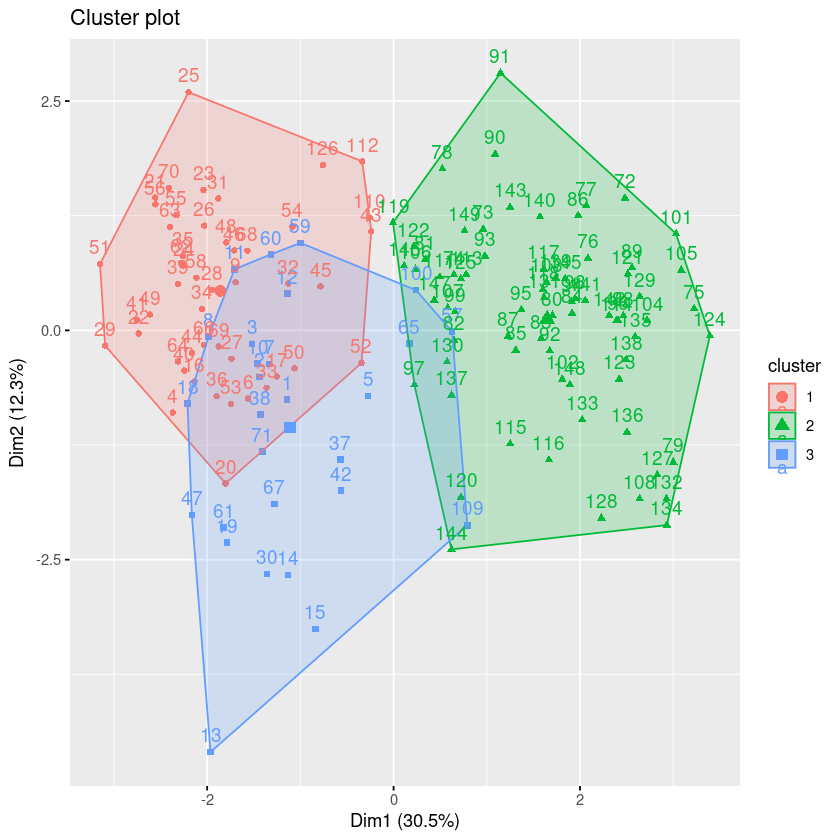

In [35]:
k=3 # numero de clusters
cl_c<-kmeans(datos_escalados,k,iter.max=1000,nstart=10)
cl_c

fviz_cluster(cl_c, df)

In [30]:
cl_c$centers  # Centros de los clústeres (medias de cada variable).

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1,-1.3909189,0.7984148,-0.2108919,-0.5638296,-0.6733237,-0.1841284,0.2495856,-0.3613702,0.06979411,0.02777987,0.657675051
2,0.1492280,0.8377124,-0.5684960,0.1571343,-0.8389035,0.9120059,-0.3913250,-1.0142832,0.11995259,0.08497426,-0.374721686
3,0.4353806,-0.8570659,0.4546956,0.1129422,0.8098689,-0.5290505,0.1615781,0.8055337,-0.10564328,-0.06652878,-0.005866582


Podemos apreciar del gráfico que los clusters se "sobreponen", lo que podría tener sentido ya que el análisis se hizo en base a 3 grupos debido a los 3 géneros de las canciones estudiadas, en los cuales estos generos podrían tener caracteristicas similares como por ejemplo el acousticness, donde el cluster 1 y 2 tienen niveles altos.

Los clusters parecen indicar:

* **Cluster 1:** Tiene niveles altos en acousticness y valence, pero niveles bajos en energy y loudness y relativamente bajos en instrumentalness, lo que podría indicar canciones acusticas y de emociones más alegres o animadas, a pesar de quizá tener una energía baja, lo cual son caracteristicas que calzan más con canciones de rock.
*  **Cluster 2:** Tiene niveles altos en instrumentalness y acousticness, pero niveles bastante bajos de energy y loudness, y relativamente bajo en valence, lo que nos indica canciones muy acusticas e instrumentales, de energía baja y más serias o menos animadas, lo que representaria canciones más clásicas.
*  **Cluster 3:** Tiene niveles bajos en acousticness e instrumentalness, relativamente bajos de speechiness y niveles altos de loudness, danceability y energy, lo que nos indica que podría indicar que a comparación de los anteriores clusters este se caracteriza por canciones más sinteticas y animadas, y con poca presencia de contenido hablado, lo cual se relaciona con canciones más electronicas.


**Mclust**

'Mclust' model object: (EVI,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

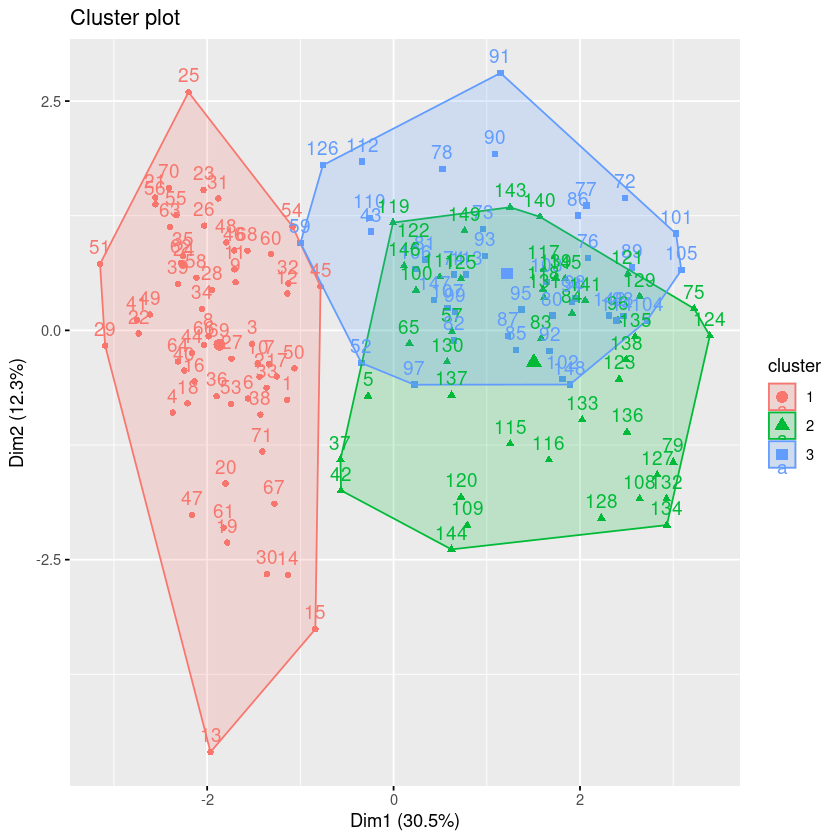

In [34]:
library(mclust)
clusB <-Mclust(datos_escalados, 3)
clusB
fviz_cluster(clusB, df)

In [39]:
summary(clusB)  # Resumen del modelo ajustado.
cl_clus <- clusB$classification  # mapea a que cluster pertenece cada dato (simplificación en base a la prob mas alta)

apply(datos_escalados[cl_clus==1,],2,summary)
apply(datos_escalados[cl_clus==2,],2,summary)
apply(datos_escalados[cl_clus==3,],2,summary)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components: 

 log-likelihood   n df      BIC       ICL
      -1802.515 149 66 -3935.29 -3941.526

Clustering table:
 1  2  3 
63 45 41 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,-2.0595735,0.08436628,-1.8216211,-1.4522433,-1.1575367,-1.1214753,-0.7870041,-2.8650438,-0.617782410,-1.37055173,-1.11990215
1st Qu.,-1.3700827,0.86092703,-1.0205729,-0.9193679,-1.1104995,0.4648545,-0.5398658,-1.3686032,-0.442076478,-0.71607630,-0.85874004
Median,-0.0441388,0.92255883,-0.3684916,-0.2342214,-1.0272978,1.1023748,-0.4219621,-0.9537352,-0.246040933,0.05040586,-0.38376827
Mean,-0.4145612,0.87211858,-0.4491719,-0.1123325,-0.8958294,0.6548749,-0.4044431,-0.9638621,0.171522845,0.16889983,0.02088216
3rd Qu.,0.4066821,0.94474628,0.1233801,0.2391564,-0.7220040,1.1733487,-0.3147770,-0.5062510,0.006627103,0.98645944,0.55500919
Max.,1.2287673,0.95214210,1.0705844,5.0104327,-0.3093103,1.2642452,0.6682639,0.5756674,6.285572998,2.51369888,2.43256412


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,-2.0595735,-1.5031433,-1.3353708,-1.272088621,-0.9238758,-1.1214753,-0.7018685,-0.4138879,-0.79784469,-1.40757751,-0.9606822
1st Qu.,0.2740877,-1.4401581,-0.3010349,-0.396200246,-0.1634588,-1.1214753,-0.4832108,0.5367257,-0.67877125,-0.84709778,-0.4085818
Median,0.8044653,-0.6774028,0.2723470,0.007402745,0.3370773,-1.1213538,-0.2627156,0.7129519,-0.27508324,-0.23806816,0.2489760
Mean,0.6194224,-0.5150689,0.3654122,-0.042300976,0.4519612,-1.0979388,0.4181516,0.6765777,-0.04422920,-0.02179278,0.4545329
3rd Qu.,1.1757295,0.3654073,1.0312347,0.321668268,1.0729648,-1.1053132,0.8826342,0.9209048,0.05890325,0.78954618,1.2001602
Max.,1.8652204,0.9472116,2.6558166,1.267525134,2.0442037,-0.8751833,4.8576718,1.3885023,3.55559652,2.86023945,2.8254446


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Min.,-1.9534980,-1.5026946,-1.6647843,-1.35793193,-0.5711802,-1.1200683,-0.7343303,-0.3105045,-0.73976008,-1.3108495,-1.0007973
1st Qu.,-0.4684408,-1.4852725,-0.4528125,-0.50575118,0.3337625,-0.5985094,-0.4464616,0.4553829,-0.46095397,-0.9008521,-0.9610957
Median,-0.2032521,-0.9904924,0.1711619,0.03415518,0.9867798,0.3104550,-0.2688405,0.7264926,-0.24023247,-0.5970622,-0.7704453
Mean,-0.0428452,-0.7747652,0.2891289,0.21903631,0.8804633,0.1987836,0.1625144,0.7384711,-0.21501525,-0.2356101,-0.5309648
3rd Qu.,0.3801632,-0.3766396,1.1324197,0.69881324,1.5502972,0.9629172,0.6131401,1.0521602,-0.03112789,0.2963151,-0.2018026
Max.,1.0166163,0.9126977,2.2960476,4.67496202,2.0740369,1.2368517,3.7858204,1.6196819,0.56714355,2.7802771,1.1257197


Podemos apreciar del gráfico que los clusters se "sobreponen", lo que podría tener sentido ya que el análisis se hizo en base a 3 grupos debido a los 3 géneros de las canciones estudiadas, en los cuales estos generos podrían tener caracteristicas similares como por ejemplo en rock y electronica, donde podrían tener caracteristicas como energy y loudness alto.

Los clusters parecen indicar:

* **Cluster 1:** Se caracteriza por tener niveles bajos de energy, speechiness, danceability y sonoridad, pero valores altos en instrumentalness y acousticness, lo que nos podría indicar que representa principalmente música clásica, la cual se caracteriza por utilizar instrumentos acusticos, ser más suave o presentar una energía más baja que otros generos.
*  **Cluster 2:** Se caracteriza por tener niveles altos de popularity, loudness, valence (indicando canciones más animadas) y energy, un poco más de speechiness que de instrumentalness, lo que nos podría indicar que representa principalmente rock, al tener un poco de presencia de contenido hablado y de instrumentos (aunque bajos), y contener canciones más animadas o con más energía.
*  **Cluster 3:**  Se caracteriza por tener niveles bajos de acousticness y speechiness, pero valores altos en energy, loudness y relativamente alto o moderado en danceability e instrumentalness, pero valores bajos en valence, lo que nos podría indicar que presenta sonidos más sintéticos con poco o nada de contenido hablado y un tono más serio, caracteristicas que concuerdan con la música electrónica.


#### b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

In [50]:
# install.packages("aricode")
library(aricode)

kmeans_clusters <- cl_c$cluster
km <- NMI(kmeans_clusters, datosC$genre)
print(paste("Mutual Information KMeans:", km))

mclus_clusters <- clusB$classification
mcl <- NMI(mclus_clusters, datosC$genre)
print(paste("Mutual Information Mclust:", mcl))


purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}

pureza_kmeans <- purity(kmeans_clusters, datosC$genre)
print(paste("Pureza KMeans:", pureza_kmeans))

pureza_gmm <- purity(mclus_clusters, datosC$genre)
print(paste("Pureza Mclust:", pureza_gmm))

[1] "Mutual Information KMeans: 0.548737785674663"
[1] "Mutual Information Mclust: 0.574984748392517"
[1] "Pureza KMeans: 0.724832214765101"
[1] "Pureza Mclust: 0.845637583892617"


En el análisis realizado, la medida de Mutual Information nos indica que si bien ambos (Kmeans y Mclust) muestran tener una medida "equilibrada" (ni muy alta, pero tampoco baja), quien muestra un leve mejor resultado es Mclust, o sea, en Mclust los clusters están representando de forma más precisa la relación entre los datos y las etiquetas (en este caso, los generos musicales de las canciones). Como los resultados fueron un poco cercanos entre sí, se decidió aplicar la medida de purity para confirmar un mejor análisis, en el cual ahora mostraron resultados más cercanos a 1, en el que nuevamente Mclust mostró un resultado más alto que Kmeans, ahora indicando que los elementos están mucho mejor agrupados que en Kmeans, o sea, los clusters reflejan de mejor manera lo que indica su etiqueta, aunque Kmeans tambien muestra un buen resultado. En conclusión, Mclust se destaca como el método más adecuado para realizar el análisis de las canciones y sus genéros.